Here we tried to analyse and find out which attributes are related to the dependent variable 'impact'. For this we used the chisquare test (since all majority of the variables are categorical in nature and the dependen variable is itself a categorical variable), followed by one hot encoding those features and then using a decision tree algorithm which gave us the most important features out of all those features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [12]:
df = pd.read_csv('../Data/cleaned_data.csv')
df

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact
0,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,Created by 171,Updated by 21,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
1,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,Created by 171,Updated by 21,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
2,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,Created by 171,Updated by 703,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
3,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,Created by 171,Updated by 332,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium
4,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,Created by 171,Updated by 332,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,INC0113694,Active,True,1,0,3,Caller 3870,Opened by 162,Created by 74,Updated by 974,Phone,Location 161,Category 31,Symptom 383,Group 24,Resolver 249,False,False,2 - Medium
37578,INC0113694,Awaiting User Info,True,1,0,4,Caller 3870,Opened by 162,Created by 74,Updated by 974,Phone,Location 161,Category 31,Symptom 383,Group 24,Resolver 249,False,False,2 - Medium
37579,INC0113694,Awaiting User Info,True,1,0,5,Caller 3870,Opened by 162,Created by 74,Updated by 845,Phone,Location 161,Category 31,Symptom 383,Group 24,Resolver 217,False,False,2 - Medium
37580,INC0113694,Resolved,True,1,0,6,Caller 3870,Opened by 162,Created by 74,Updated by 845,Phone,Location 161,Category 31,Symptom 383,Group 24,Resolver 217,False,True,2 - Medium


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37582 entries, 0 to 37581
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  37582 non-null  object
 1   ID_status           37582 non-null  object
 2   active              37582 non-null  bool  
 3   count_reassign      37582 non-null  int64 
 4   count_opening       37582 non-null  int64 
 5   count_updated       37582 non-null  int64 
 6   ID_caller           37582 non-null  object
 7   opened_by           37582 non-null  object
 8   Created_by          37582 non-null  object
 9   updated_by          37582 non-null  object
 10  type_contact        37582 non-null  object
 11  location            37582 non-null  object
 12  category_ID         37582 non-null  object
 13  user_symptom        37582 non-null  object
 14  Support_group       37582 non-null  object
 15  support_incharge    37582 non-null  object
 16  Doc_knowledge       37

In [14]:
df = df.drop(columns=['ID'])

In [19]:
lst = ['ID_status', 'active', 'ID_caller', 'opened_by', 'Created_by',
      'updated_by', 'type_contact', 'location', 'category_ID', 'user_symptom',
      'Support_group', 'support_incharge', 'Doc_knowledge', 'confirmation_check']
for i in lst : 
    print("\n", i)
    contingency_table = pd.crosstab(df[i], df['impact'])
    chi, p_value, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05
    critical_value = chi2.ppf(1-alpha, dof)
    print(f"Critical value: {critical_value:.2f}")
    print('Chi-Square Statistic:', chi)
    print('P-Value:', p_value)
    print('Degrees of Freedom:', dof)
    print('Expected Frequencies:', expected)


 ID_status
Critical value: 23.68
Chi-Square Statistic: 70.87852037300584
P-Value: 1.337450781262993e-09
Degrees of Freedom: 14
Expected Frequencies: [[2.80757836e+02 1.02840234e+04 3.24218802e+02]
 [4.64105157e-01 1.69999468e+01 5.35948060e-01]
 [3.35187058e+00 1.22777393e+02 3.87073599e+00]
 [9.91380182e+01 3.63137752e+03 1.14484461e+02]
 [8.35389282e+00 3.05999042e+02 9.64706508e+00]
 [1.48436299e+02 5.43714965e+03 1.71414055e+02]
 [2.74286148e+02 1.00469685e+04 3.16745304e+02]
 [1.54211830e+02 5.64870454e+03 1.78083630e+02]]

 active
Critical value: 5.99
Chi-Square Statistic: 7.143279638294506
P-Value: 0.028109721007285746
Degrees of Freedom: 2
Expected Frequencies: [[  148.43629929  5437.14964611   171.4140546 ]
 [  820.56370071 30056.85035389   947.5859454 ]]

 ID_caller
Critical value: 6595.34
Chi-Square Statistic: 31141.929248977278
P-Value: 0.0
Degrees of Freedom: 6408
Expected Frequencies: [[ 0.07735086  2.83332446  0.08932468]
 [ 0.23205258  8.49997339  0.26797403]
 [ 0.4898

As we can see from the above chisquare test that all the variables have a shi-square statistic value which is greater than the critical value and a P-value which is less than the level of significance (0.005). This provides strong evidence against the null hypothesis. Therefore we can conclude that these attributes are not independent with the 'impact' attribute. Therefore these attributes have to be taken into consideration.

In [20]:
X = df.drop(columns=['impact'])
y = df['impact']
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X[['ID_status', 'active', 'ID_caller','opened_by', 'Created_by', 'updated_by',
                                'type_contact', 'location', 'category_ID', 'user_symptom', 'Support_group',
                                'support_incharge', 'Doc_knowledge', 'confirmation_check']])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=ohe.get_feature_names(['ID_status', 'active', 'ID_caller','opened_by', 'Created_by', 'updated_by',
                                'type_contact', 'location', 'category_ID', 'user_symptom', 'Support_group',
                                'support_incharge', 'Doc_knowledge', 'confirmation_check']))
X_final = pd.concat([X, X_encoded_df], axis=1)
X_final.drop(columns=['ID_status', 'active', 'ID_caller','opened_by', 'Created_by', 'updated_by',
                                'type_contact', 'location', 'category_ID', 'user_symptom', 'Support_group',
                                'support_incharge', 'Doc_knowledge', 'confirmation_check'], inplace=True)

C:\Users\Dev\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


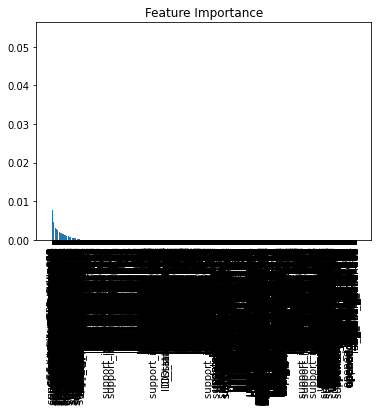

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_final, y)
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_final.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_final.shape[1]), importances[indices])
plt.xticks(range(X_final.shape[1]), names, rotation=90)
plt.show()

In [22]:
names

['count_updated',
 'Created_by_Created by 62',
 'Doc_knowledge_False',
 'opened_by_Opened by  20',
 'count_reassign',
 'support_incharge_Resolver 15',
 'support_incharge_Resolver 244',
 'Support_group_Group 14',
 'Created_by_Created by 151',
 'confirmation_check_False',
 'location_Location 204',
 'Created_by_Created by 21',
 'location_Location 143',
 'opened_by_Opened by  17',
 'category_ID_Category 53',
 'category_ID_Category 34',
 'Support_group_Group 15',
 'category_ID_Category 20',
 'ID_caller_Caller 5093',
 'location_Location 93',
 'ID_caller_Caller 2491',
 'Created_by_Created by 200',
 'ID_caller_Caller 4245',
 'opened_by_Opened by  172',
 'ID_caller_Caller 5475',
 'ID_caller_Caller 1951',
 'opened_by_Opened by  72',
 'user_symptom_Symptom 491',
 'confirmation_check_True',
 'category_ID_Category 9',
 'opened_by_Opened by  24',
 'ID_caller_Caller 5197',
 'support_incharge_Resolver 34',
 'support_incharge_Resolver 101',
 'ID_status_New',
 'ID_status_Resolved',
 'support_incharge_Re

'count_updated',
 'Created_by_Created by 62',
 'Doc_knowledge_False',
 'opened_by_Opened by  20',
 'count_reassign',
 'support_incharge_Resolver 15',
 'support_incharge_Resolver 244',
 'Support_group_Group 14',
 'Created_by_Created by 151',
 'confirmation_check_False',

In [27]:
x_latest = X_final[['count_updated', 'Created_by_Created by 62', 'Doc_knowledge_False', 'count_reassign', 'support_incharge_Resolver 15', 'support_incharge_Resolver 244', 'Support_group_Group 14', 'Created_by_Created by 151', 'confirmation_check_False']]
x_latest

,count_updated,Created_by_Created by 62,Doc_knowledge_False,count_reassign,support_incharge_Resolver 15,support_incharge_Resolver 244,Support_group_Group 14,Created_by_Created by 151,confirmation_check_False
0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
1,2,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
2,4,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
3,5,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
4,6,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
37577,3,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0
37578,4,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0
37579,5,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0
37580,6,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0


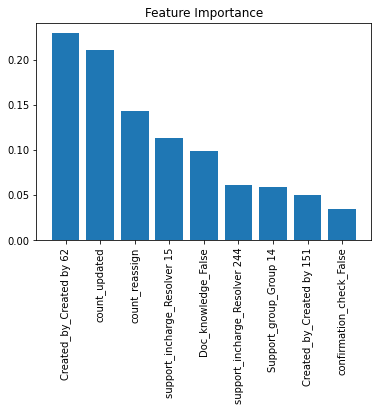

In [28]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_latest, y)
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_latest.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(x_latest.shape[1]), importances[indices])
plt.xticks(range(x_latest.shape[1]), names, rotation=90)
plt.show()

In [31]:
new_df = pd.concat([x_latest, df['impact']], axis=1)
new_df

,count_updated,Created_by_Created by 62,Doc_knowledge_False,count_reassign,support_incharge_Resolver 15,support_incharge_Resolver 244,Support_group_Group 14,Created_by_Created by 151,confirmation_check_False,impact
0,1,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
1,2,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
2,4,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
3,5,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
4,6,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
...,...,...,...,...,...,...,...,...,...,...
37577,3,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
37578,4,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
37579,5,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,2 - Medium
37580,6,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,2 - Medium


In [33]:
new_df.to_csv('../Data/preprocessed_data.csv', index=False)